In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [8]:
df=pd.read_csv("housing_1.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [10]:
df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
MEDV        22.532806
dtype: float64

In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [14]:
x_train_scaled[0]

array([0.00294549, 0.        , 0.33148148, 0.        , 0.41152263,
       0.42785974, 0.69721936, 0.160327  , 0.2173913 , 0.38931298,
       0.68888889, 1.        , 0.34133554])

In [15]:
x_train_scaled[0].shape

(13,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def house_price_prediction():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
#     opt = tf.keras.optimizers.Adam()
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    return model

In [17]:
model= house_price_prediction()
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))



Epoch 1/100


354/354 [==============================] - 4s 5ms/step - loss: 157.3329 - mae: 8.6457 - val_loss: 51.3309 - val_mae: 5.0917
Epoch 2/100
354/354 [==============================] - 1s 4ms/step - loss: 40.7692 - mae: 4.5453 - val_loss: 27.7165 - val_mae: 3.5131
Epoch 3/100
354/354 [==============================] - 1s 4ms/step - loss: 27.9051 - mae: 3.7611 - val_loss: 34.2483 - val_mae: 4.3594
Epoch 4/100
354/354 [==============================] - 1s 3ms/step - loss: 25.0804 - mae: 3.4593 - val_loss: 35.8540 - val_mae: 4.9002
Epoch 5/100
354/354 [==============================] - 1s 4ms/step - loss: 22.4101 - mae: 3.2660 - val_loss: 18.9621 - val_mae: 2.9755
Epoch 6/100
354/354 [==============================] - 1s 3ms/step - loss: 20.7610 - mae: 3.1973 - val_loss: 17.8626 - val_mae: 2.7446
Epoch 7/100
354/354 [==============================] - 1s 3ms/step - loss: 19.7664 - mae: 3.0283 - val_loss: 16.6470 - val_mae: 2.6463
Epoch 8/100
354/354 [=============================

354/354 [==============================] - 1s 4ms/step - loss: 7.2713 - mae: 2.0148 - val_loss: 13.6220 - val_mae: 2.6534
Epoch 56/100
354/354 [==============================] - 1s 4ms/step - loss: 6.8124 - mae: 1.9390 - val_loss: 18.5676 - val_mae: 3.4329
Epoch 57/100
354/354 [==============================] - 1s 3ms/step - loss: 7.7471 - mae: 2.0501 - val_loss: 15.1634 - val_mae: 2.8727
Epoch 58/100
354/354 [==============================] - 1s 4ms/step - loss: 6.9387 - mae: 2.0076 - val_loss: 12.0096 - val_mae: 2.3290
Epoch 59/100
354/354 [==============================] - 1s 4ms/step - loss: 6.6882 - mae: 1.9478 - val_loss: 17.0490 - val_mae: 3.1719
Epoch 60/100
354/354 [==============================] - 1s 4ms/step - loss: 6.4003 - mae: 1.9085 - val_loss: 17.4643 - val_mae: 3.1458
Epoch 61/100
354/354 [==============================] - 1s 4ms/step - loss: 5.6129 - mae: 1.7969 - val_loss: 20.8975 - val_mae: 3.6153
Epoch 62/100
354/354 [==============================] - 1s 4ms/step 

In [18]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 0s 236ms/step
predicted output: [[23.047903]]


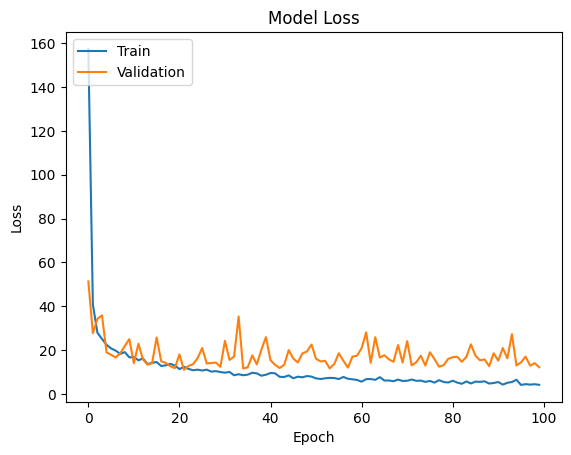

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
mse_nn, mae_nn = model.evaluate(x_test_scaled, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 4ms/step - loss: 12.1723 - mae: 2.5979
Mean squared error on test data:  12.172261238098145
Mean absolute error on test data:  2.597905397415161
